# This is the coin flip problem, it is all over the book


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm

%matplotlib inline
sns.set(font_scale=1.5)

# Chaper 1
page 18

In [4]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
beta_params = [(1, 1), (0.5, 0.5), (20, 20)]

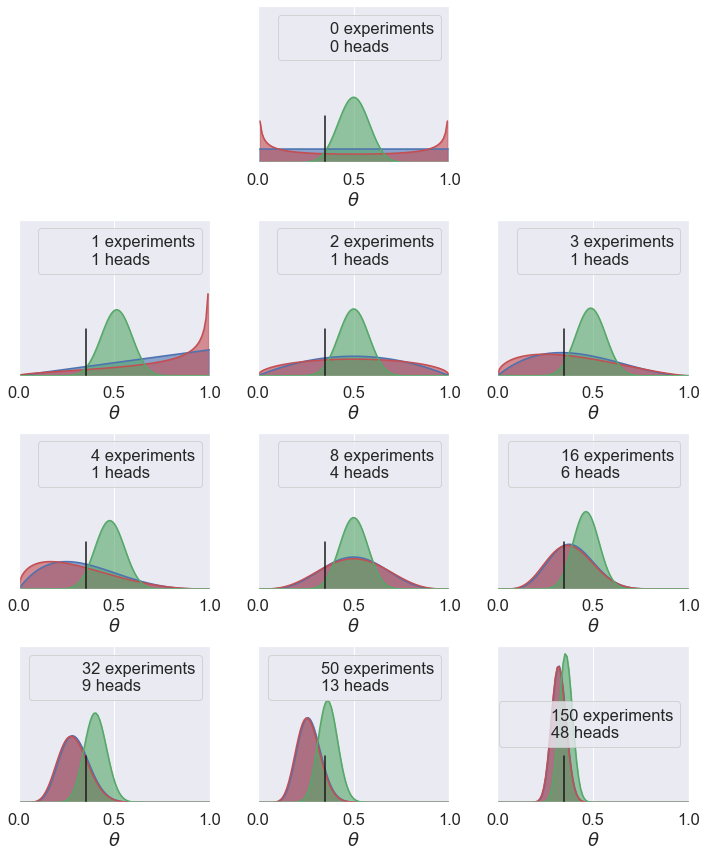

In [5]:
plt.figure(figsize=(10,12))

dist = stats.beta
x = np.linspace(0, 1, 100)
for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

1. Blue is uniform prior
1. red has more 1, 0 than uniform
1. green is centered around 0.5, we think we know the answer

# Solve using a grid method
ch2 page 34

In [6]:
def posterior_grid(grid_points=100, heads=6, tosses=9):
    """
    A grid implementation for the coin-flip problem
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1, grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid, posterior

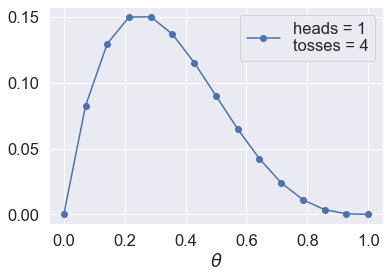

In [7]:
#Assuming we made 4 tosses and we observe only 1 head we have the following:
points = 15
h, n = 1, 4
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

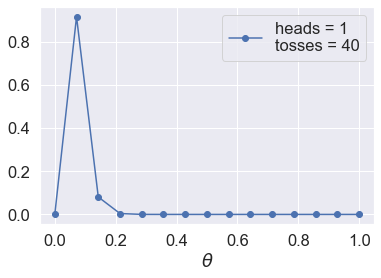

In [8]:
#Assuming we made 40 tosses and we observe only 1 head we have the following:
points = 15
h, n = 1, 40
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

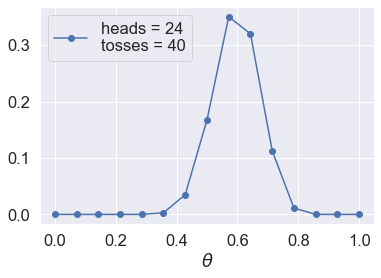

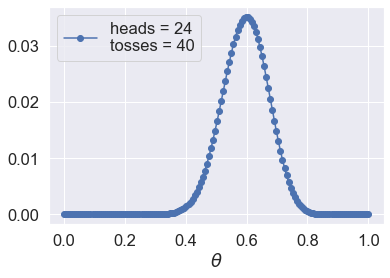

In [9]:
#Assuming we made 40 tosses and we observe 24 head we have the following:
points = 15
h, n = 24, 40
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

plt.figure()
points = 150
h, n = 24, 40
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)


## Chapter 2
Coin flip pymc3

In [10]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


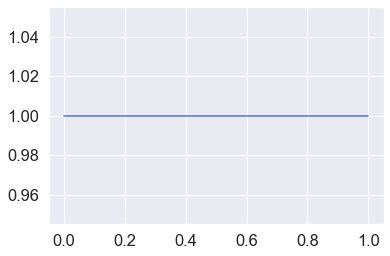

In [11]:
XX = np.linspace(0,1,100)
plt.plot(XX, stats.beta(1,1).pdf(XX))

In [12]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start, chains=4)

/Users/balarsen/anaconda3/envs/python3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 1727.59it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:00<00:00, 7484.26draws/s]
The number of effective samples is smaller than 25% for some parameters.


### Convergence checking
page 49

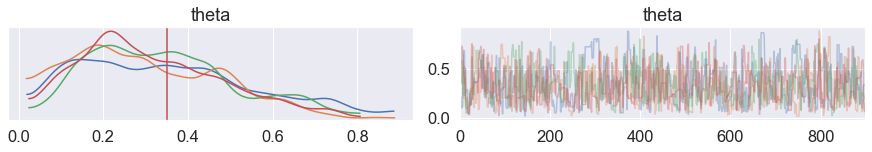

In [13]:
burnin = 100
chain = trace[burnin:]
ax = pm.traceplot(chain, lines={'theta':theta_real});
ax[0][0].axvline(theta_real, c='r')


In [14]:
theta_real

0.35

In [15]:
pm.gelman_rubin(chain) # want < 1.1

{'theta': 1.0071213766545901}

(<Figure size 432x316.8 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c13e5390>],
       dtype=object))

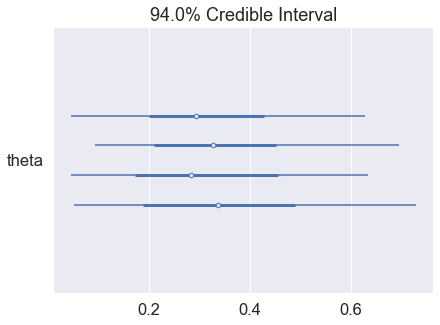

In [16]:
pm.forestplot(chain)

In [17]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.330944,0.183307,0.006786,0.031051,0.688781,622.127376,1.004609


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c15cf6d0>,
      dtype=object)

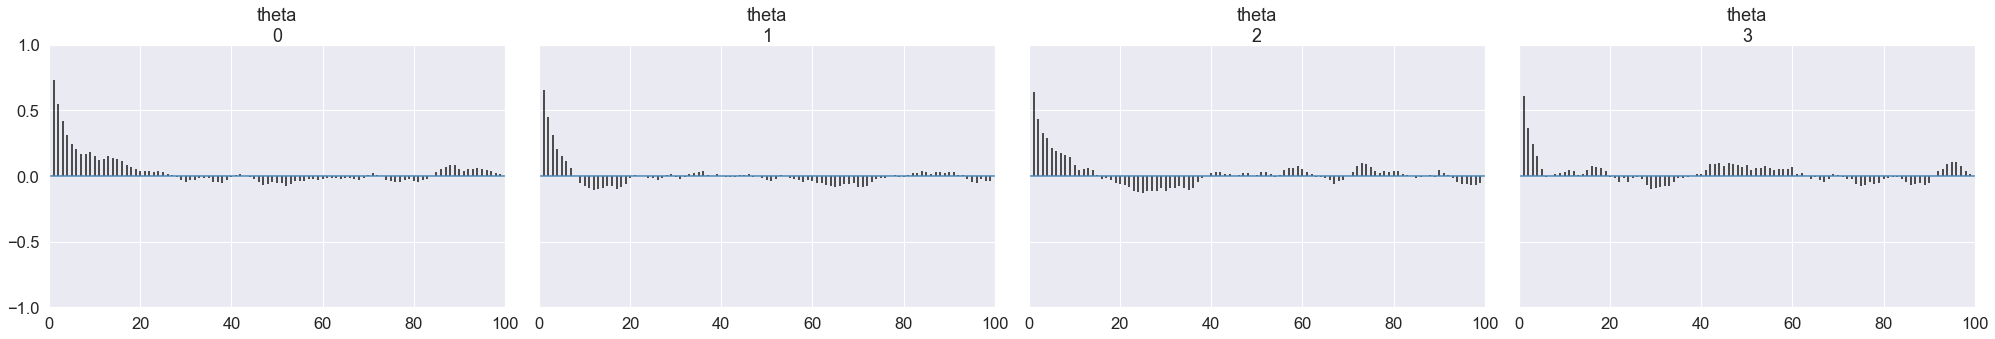

In [18]:
pm.autocorrplot(trace)

In [19]:
# a measure of eff n based on autocorrelecation
pm.effective_n(trace)

{'theta': 622.1273761248884}

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e3b3ec10>],
      dtype=object)

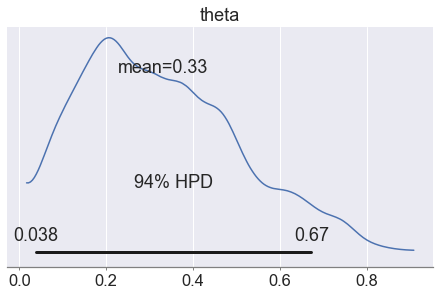

In [20]:
# AKA Kruschke plot
pm.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e3dc3790>],
      dtype=object)

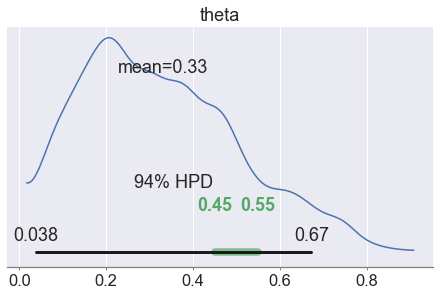

In [21]:
pm.plot_posterior(trace, rope=[0.45, .55])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e4096950>],
      dtype=object)

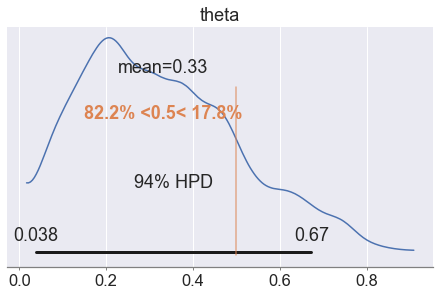

In [22]:
pm.plot_posterior(trace, ref_val=0.50)

### Try pymc3 with a lot more data
Coin is clearly not fair at the 1000 flips level

In [23]:
data = stats.bernoulli.rvs(p=theta_real, size=1000) # 1000 flips in the data


In [24]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, start=start, chains=4)

/Users/balarsen/anaconda3/envs/python3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -693.15, ||grad|| = 158: 100%|██████████| 7/7 [00:00<00:00, 2352.20it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:05<00:00, 7733.99draws/s]
The number of effective samples is smaller than 25% for some parameters.


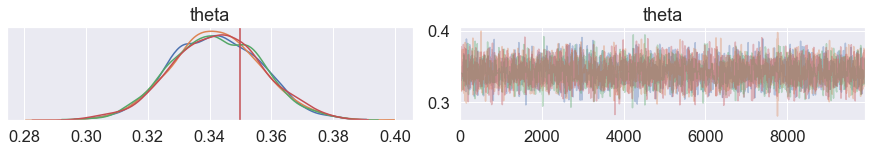

In [25]:
burnin = 100
chain = trace[burnin:]
ax = pm.traceplot(chain, lines={'theta':theta_real});
ax[0][0].axvline(theta_real, c='r')


In [26]:
pm.gelman_rubin(chain) # want < 1.1

{'theta': 1.000043320437209}

(<Figure size 432x316.8 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c1544250>],
       dtype=object))

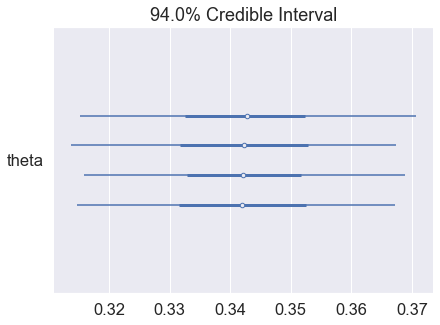

In [27]:
pm.forestplot(chain) # super tight range

In [28]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.342285,0.014578,0.000207,0.315488,0.372248,4809.592196,1.000044


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e4140210>,
      dtype=object)

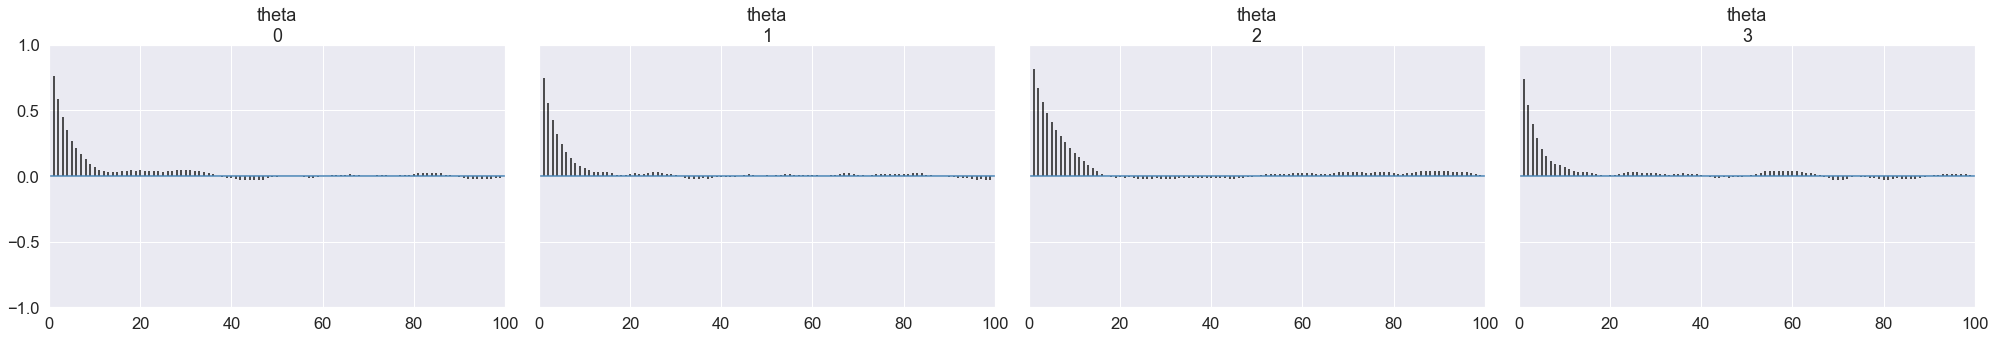

In [29]:
pm.autocorrplot(trace)

In [30]:
pm.effective_n(trace)

{'theta': 4809.5921958194795}

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a08e2390>],
      dtype=object)

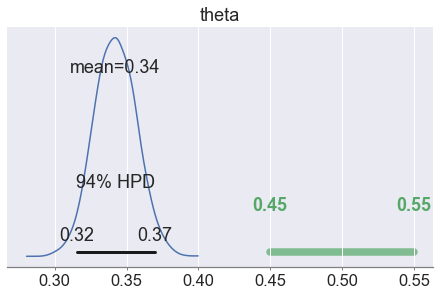

In [31]:
pm.plot_posterior(trace, rope=[0.45, .55])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c0af2a50>],
      dtype=object)

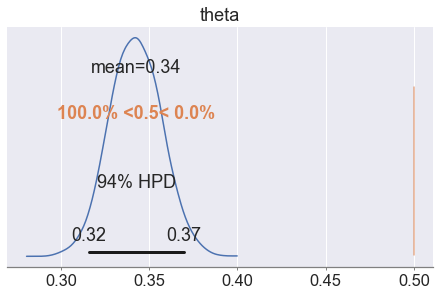

In [32]:
pm.plot_posterior(trace, ref_val=0.50)

### Try pymc3 with a lot more data
Coin is  not fair at the 25 flips level (for these data)

In [33]:
data = stats.bernoulli.rvs(p=theta_real, size=25) # 25 flips in the data


In [34]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, start=start, chains=4)

/Users/balarsen/anaconda3/envs/python3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -17.329, ||grad|| = 6.5: 100%|██████████| 7/7 [00:00<00:00, 2563.08it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:05<00:00, 7731.51draws/s]
The number of effective samples is smaller than 25% for some parameters.


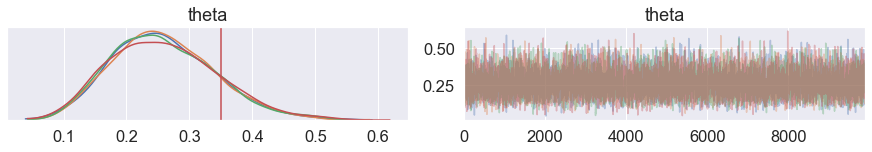

In [35]:
burnin = 100
chain = trace[burnin:]
ax = pm.traceplot(chain, lines={'theta':theta_real});
ax[0][0].axvline(theta_real, c='r')


In [36]:
pm.gelman_rubin(chain) # want < 1.1

{'theta': 1.0000285410022884}

(<Figure size 432x316.8 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c152a110>],
       dtype=object))

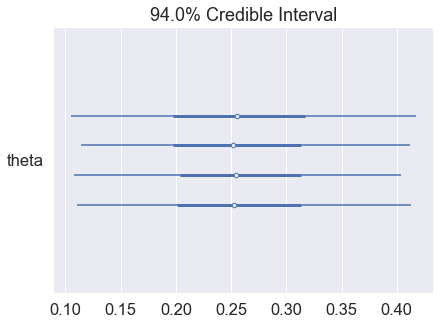

In [37]:
pm.forestplot(chain) # super tight range

In [38]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.259769,0.082795,0.000832,0.103022,0.418125,8752.246218,1.000019


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c187fdd0>,
      dtype=object)

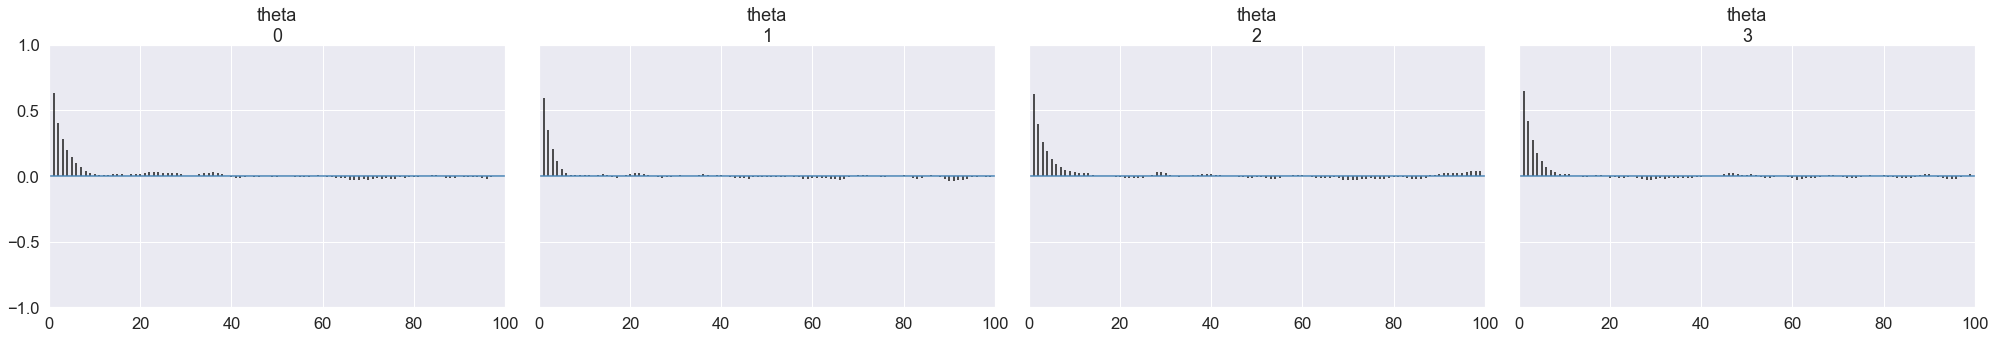

In [39]:
pm.autocorrplot(trace)

In [40]:
pm.effective_n(trace)

{'theta': 8752.246217874024}

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff088b7bdd0>],
      dtype=object)

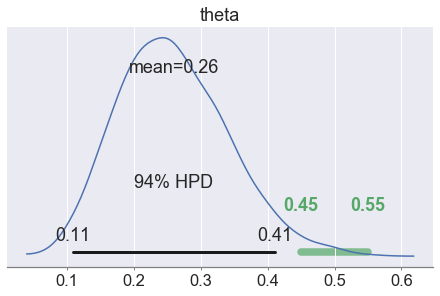

In [41]:
pm.plot_posterior(trace, rope=[0.45, .55])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a101fa50>],
      dtype=object)

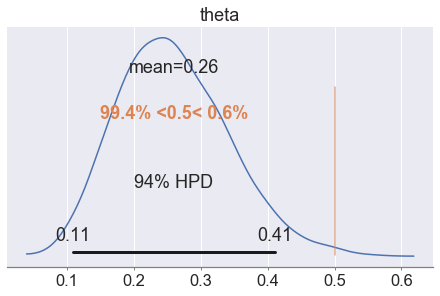

In [42]:
pm.plot_posterior(trace, ref_val=0.50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e45de890>],
      dtype=object)

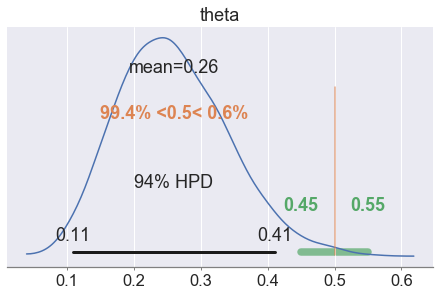

In [43]:
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])

# Explore priors on the coin flip
Ex 2-5 page 59

In [44]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


/Users/balarsen/anaconda3/envs/python3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 2196.16it/s]
Multiprocess sampling (8 chains in 4 jobs)
Metropolis: [theta]
Sampling 8 chains: 100%|██████████| 44000/44000 [00:05<00:00, 7625.10draws/s]
The number of effective samples is smaller than 25% for some parameters.


Text(0.5, 1.0, "pm.Beta('theta', alpha=1, beta=1)")

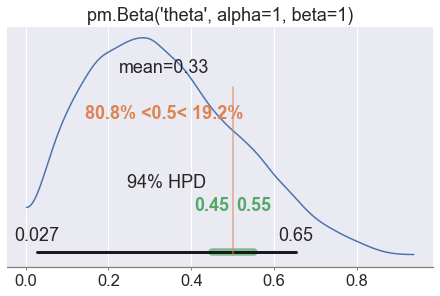

In [48]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, start=start, chains=8)
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])
plt.title("pm.Beta('theta', alpha=1, beta=1)")

Multiprocess sampling (8 chains in 4 jobs)
Metropolis: [theta]
Sampling 8 chains: 100%|██████████| 44000/44000 [00:05<00:00, 7626.29draws/s]
The number of effective samples is smaller than 25% for some parameters.


Text(0.5, 1.0, "pm.Uniform('theta', 0, 1)")

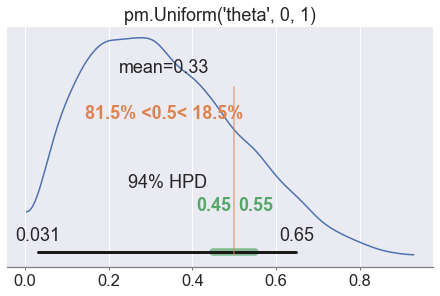

In [49]:
with pm.Model() as our_first_model:
    theta = pm.Uniform('theta', 0, 1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, chains=8)
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])
plt.title("pm.Uniform('theta', 0, 1)")

Multiprocess sampling (8 chains in 4 jobs)
Metropolis: [theta]
Sampling 8 chains: 100%|██████████| 44000/44000 [00:05<00:00, 7795.77draws/s]
The number of effective samples is smaller than 25% for some parameters.


Text(0.5, 1.0, "pm.Normal('theta', 0.35, 1)")

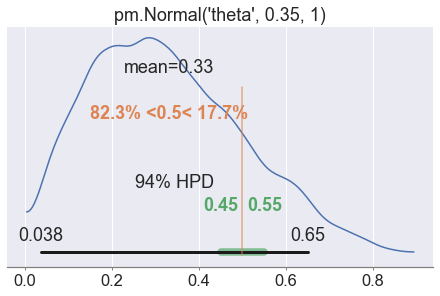

In [50]:
with pm.Model() as our_first_model:
    theta = pm.Normal('theta', 0.35, 1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis()
    trace = pm.sample(5000, step=step, chains=8)
pm.plot_posterior(trace, ref_val=0.50, rope=[0.45, .55])
plt.title("pm.Normal('theta', 0.35, 1)")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e4008f10>],
      dtype=object)

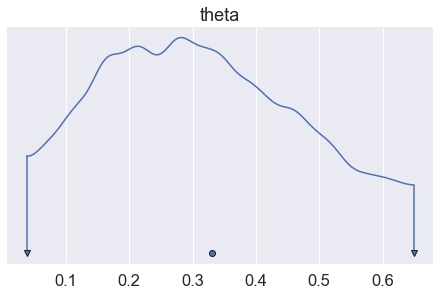

In [52]:
pm.plots.densityplot(trace, hpd_markers='v')